# 2: TensorFlow 2.0

## A Simple MLP

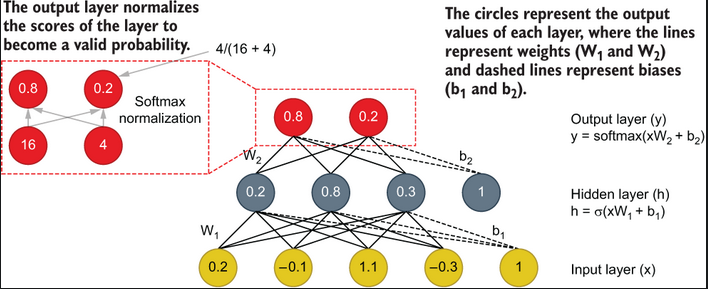

In [ ]:
# importing numpy and tensorflow
import numpy as np
import tensorflow as tf

# the input to the MLP (a NumPy array)
x = np.random.normal(size=[1,4]).astype('float32')

# the initalizer used to initialize variables
init = tf.keras.initializers.RandomNormal()

# the parameters of layers 1 and layers 2
w1 = tf.Variable(init(shape=[4,3]))
b1 = tf.Variable(init(shape=[1,3]))

w2 = tf.Variable(init(shape=[3,2]))
b2 = tf.Variable(init(shape=[1,2]))


@tf.function # this line tells TensorFlow's autograph to build the graph
def forward(x, W, b, act):
    """  
    MLP Layer computation, which takes in an input, weights,
    bias, and a nonlinear activation.
    """
    return act(tf.matmul(x, W) + b)

# computing the first hidden layer output
h = forward(x, w1, b1, tf.nn.sigmoid)

# computing the final output
y = forward(h, w2, b2, tf.nn.softmax)
print(y)

tf.Tensor([[0.54253787 0.45746213]], shape=(1, 2), dtype=float32)


/home/shivamsingh/DeepLearning/.venv/lib64/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


## TensorFlow building blocks

There are three major basic elements : 
- `tf.Variable` (ex: w1, b1, w2 and b2)
- `tf.Tensor` (ex: h and y)
- `tf.Operation` (ex: tf.matmul)

#### `tf.Variable`

- A `tf.Variable` is a **mutable tensor** in TensorFlow.
- It has the following properties:
  - **Shape** – the dimensions of the tensor.
  - **Initial value** – the starting value of the variable.
  - **Data type** – e.g., `tf.float32`, `tf.int32`.
  - **Trainable** – whether the variable will be updated during training (default `True`).

In [3]:
v1 = tf.Variable(tf.constant(2.0, shape=[4], dtype='float32'))

print(v1)

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>


In [4]:
# from a numpy
v2  = tf.Variable(np.ones(shape=[2,4], dtype='float32'))

print(v2)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [6]:
# from a random variable

v3 = tf.Variable(tf.keras.initializers.RandomNormal()(shape=[3,4,5]))
print(v3)

<tf.Variable 'Variable:0' shape=(3, 4, 5) dtype=float32, numpy=
array([[[-0.00787037,  0.08272692, -0.07603759,  0.04705548,
         -0.01374103],
        [ 0.05483342,  0.03608883, -0.03296912,  0.04862008,
          0.07114574],
        [-0.020775  ,  0.02401549, -0.00174158, -0.00708389,
          0.03760074],
        [-0.05221638, -0.05203583,  0.05586795,  0.01728312,
         -0.05364311]],

       [[ 0.05578121,  0.00416979,  0.01199832,  0.07541993,
         -0.03910786],
        [-0.05777694, -0.07233496,  0.03767033, -0.02544019,
          0.02887326],
        [ 0.05865585,  0.06604318,  0.03031409, -0.0196753 ,
         -0.06610844],
        [-0.03916519, -0.09478042,  0.06228378,  0.00026082,
          0.00212422]],

       [[-0.10156351, -0.06844452,  0.00149774,  0.05155638,
          0.03414167],
        [ 0.01844686, -0.0375811 ,  0.00296538, -0.0706627 ,
         -0.0324113 ],
        [ 0.00929829, -0.03314955,  0.06308945, -0.03432939,
          0.03060472],
        

In [7]:
# to a numpy
arr = v3.numpy()

print(arr)

[[[-0.00787037  0.08272692 -0.07603759  0.04705548 -0.01374103]
  [ 0.05483342  0.03608883 -0.03296912  0.04862008  0.07114574]
  [-0.020775    0.02401549 -0.00174158 -0.00708389  0.03760074]
  [-0.05221638 -0.05203583  0.05586795  0.01728312 -0.05364311]]

 [[ 0.05578121  0.00416979  0.01199832  0.07541993 -0.03910786]
  [-0.05777694 -0.07233496  0.03767033 -0.02544019  0.02887326]
  [ 0.05865585  0.06604318  0.03031409 -0.0196753  -0.06610844]
  [-0.03916519 -0.09478042  0.06228378  0.00026082  0.00212422]]

 [[-0.10156351 -0.06844452  0.00149774  0.05155638  0.03414167]
  [ 0.01844686 -0.0375811   0.00296538 -0.0706627  -0.0324113 ]
  [ 0.00929829 -0.03314955  0.06308945 -0.03432939  0.03060472]
  [-0.0432633  -0.07272252 -0.1589472   0.05607611  0.02749145]]]


In [10]:
# change element
v3 = v3[0,2].assign(1)
print(v3)

<tf.Variable 'UnreadVariable' shape=(3, 4, 5) dtype=float32, numpy=
array([[[-7.8703742e-03,  8.2726918e-02, -7.6037586e-02,  4.7055483e-02,
         -1.3741033e-02],
        [ 5.4833420e-02,  3.6088832e-02, -3.2969125e-02,  4.8620079e-02,
          7.1145736e-02],
        [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
          1.0000000e+00],
        [-5.2216381e-02, -5.2035827e-02,  5.5867951e-02,  1.7283123e-02,
         -5.3643107e-02]],

       [[ 5.5781212e-02,  4.1697873e-03,  1.1998323e-02,  7.5419925e-02,
         -3.9107855e-02],
        [-5.7776935e-02, -7.2334960e-02,  3.7670333e-02, -2.5440190e-02,
          2.8873259e-02],
        [ 5.8655847e-02,  6.6043183e-02,  3.0314092e-02, -1.9675300e-02,
         -6.6108443e-02],
        [-3.9165191e-02, -9.4780423e-02,  6.2283784e-02,  2.6081988e-04,
          2.1242180e-03]],

       [[-1.0156351e-01, -6.8444520e-02,  1.4977355e-03,  5.1556379e-02,
          3.4141675e-02],
        [ 1.8446855e-02, -3.7581105e-

#### `tf.Tensor`

- A `tf.Tensor` is an **immutable multi-dimensional array** in TensorFlow.
- It has the following properties:
  - **Shape** – the dimensions of the tensor (e.g., `[2, 3]`).
  - **Data type** – e.g., `tf.float32`, `tf.int32`.
  - **Rank** – number of dimensions.
- Unlike `tf.Variable`, a tensor **cannot be changed after creation**.

In [11]:
v = tf.Variable(np.ones(shape=[4,3]), dtype='float32')
b = v * 3.0

print(type(b).__name__)

EagerTensor


In [13]:
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_max1 = tf.argmax(d, axis=0)
print(d_max1)

# Computing argmin
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_min1 = tf.argmin(d, axis=1)
print(d_min1)

# Computing cumulative sum
e = tf.constant([1,2,3,4,5])
e_cumsum = tf.cumsum(e)
print(e_cumsum)

# Bonus: Segmented sum
f = tf.constant(np.random.normal(size=[10]))
segments = [0,0,0, 0, 1, 1, 1, 2,2, 3]
f_sum = tf.math.segment_sum(f, segments)
print(f_sum)

tf.Tensor([2 2 1], shape=(3,), dtype=int64)
tf.Tensor([0 0 2], shape=(3,), dtype=int64)
tf.Tensor([ 1  3  6 10 15], shape=(5,), dtype=int32)
tf.Tensor([-1.21744711 -1.27329725  1.51306118 -0.02471073], shape=(4,), dtype=float64)


#### `tf.Operation`

- A `tf.Operation` represents a **computation in a TensorFlow graph**.
- It is **a node in the computational graph**, performing a specific operation on input tensors to produce output tensors.
- Properties:
  - **Inputs** – tensors consumed by the operation.
  - **Outputs** – tensors produced by the operation.
  - **Name** – unique identifier in the graph.
  - **Type** – type of computation (e.g., `MatMul`, `Add`).

In [12]:
# Define tensors
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Create an operation
c = tf.matmul(a, b)  # Matrix multiplication

print(c)
print("Type of c:", type(c))

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)
Type of c: <class 'tensorflow.python.framework.ops.EagerTensor'>


## Neural network-related computations in TensorFlow

Size of the final image is (512, 512).


(-0.5, 511.5, 511.5, -0.5)

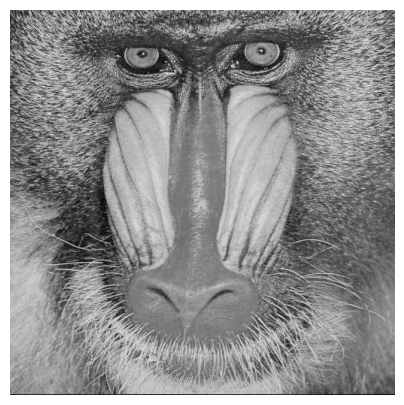

In [22]:
# PIL is a python library for basic image manipulation
from PIL import Image
import matplotlib.pyplot as plt

# reading image
x_rgb = np.array(Image.open("baboon.jpg")).astype('float32')

# creating a tensor from the image
x_rgb = tf.constant(x_rgb)

# rgb weights of grey
grays = tf.constant([[0.3], [0.59], [0.11]])

# defining matrix multiplication
x = tf.matmul(x_rgb, grays)
x = tf.squeeze(x)
print(f"Size of the final image is {x.shape}.")

# plotting the image
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.imshow(x.numpy(), cmap="grey")
axes.axis("off")

## Convulation Operation

The size of the final image: (1, 510, 510, 1)


Text(0.5, 1.0, 'Edge detection')

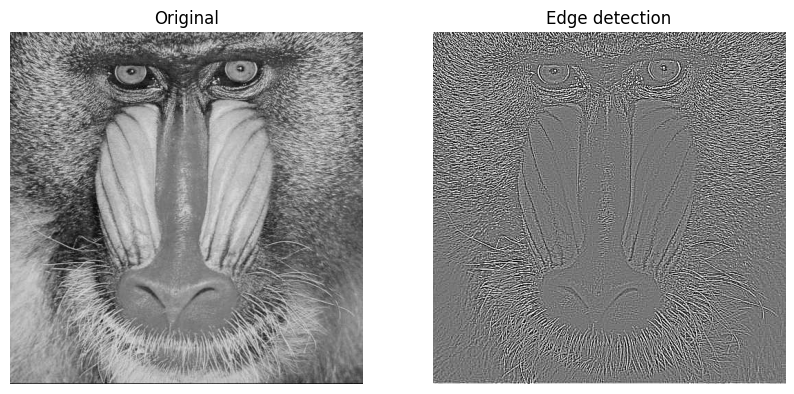

In [36]:
# Defining the input image
y = tf.constant(x)

# Defining the convolution kernel as a TensorFlow variable
f = tf.Variable(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).astype('float32'))

# Reshaping the input and the kernel to meet tf.nn.convolution requirements
y_reshaped = tf.reshape(y, [1,512,512,1]) # [batch size, height, width, channels]
f_reshaped = tf.reshape(f, [3,3,1,1]) # [height, width, in channels, out channels]

# Convolving the images
y_conv = tf.nn.convolution(y_reshaped, f_reshaped)

def improve_contrast(x,n=3):
    """ This is function to improve the contrast in the image for visual purposes. """
    return np.clip(x*n, np.min(x), np.max(x))

y_conv_clipped = improve_contrast(y_conv, 4)
print("The size of the final image: {}".format(y_conv.shape))

fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(x, cmap='gray')
axes[0].axis("off")
axes[0].set_title("Original")

axes[1].imshow(np.squeeze(y_conv_clipped), cmap='gray')
axes[1].axis("off")
axes[1].set_title("Edge detection")